In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Task 1

### (a) Data loading

In [7]:
diabetes = load_diabetes()
X = diabetes.data 
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
print(f"Features: {diabetes.feature_names}")

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### (b) Data cleaning
The diabetes dataset is already preprocessed such that all features are zero-mean and normalized.

### (c) Statistical analysis

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


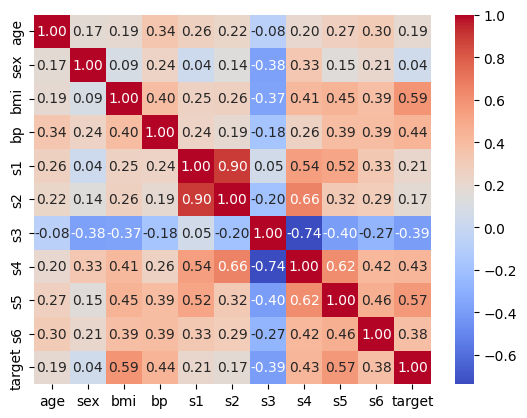

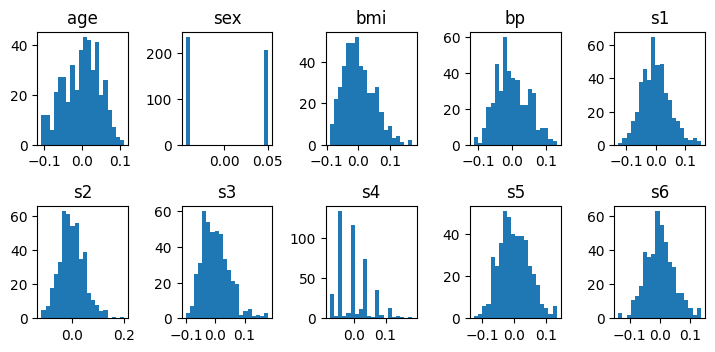

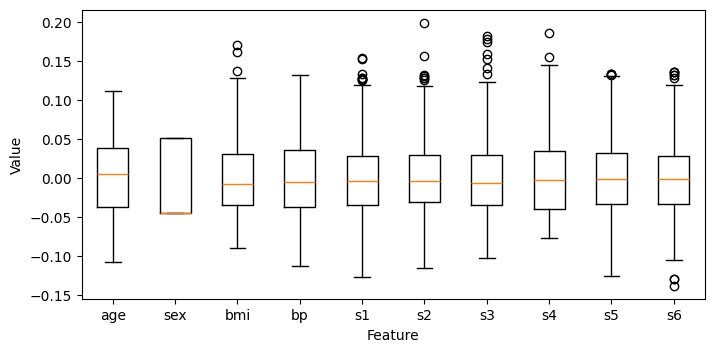

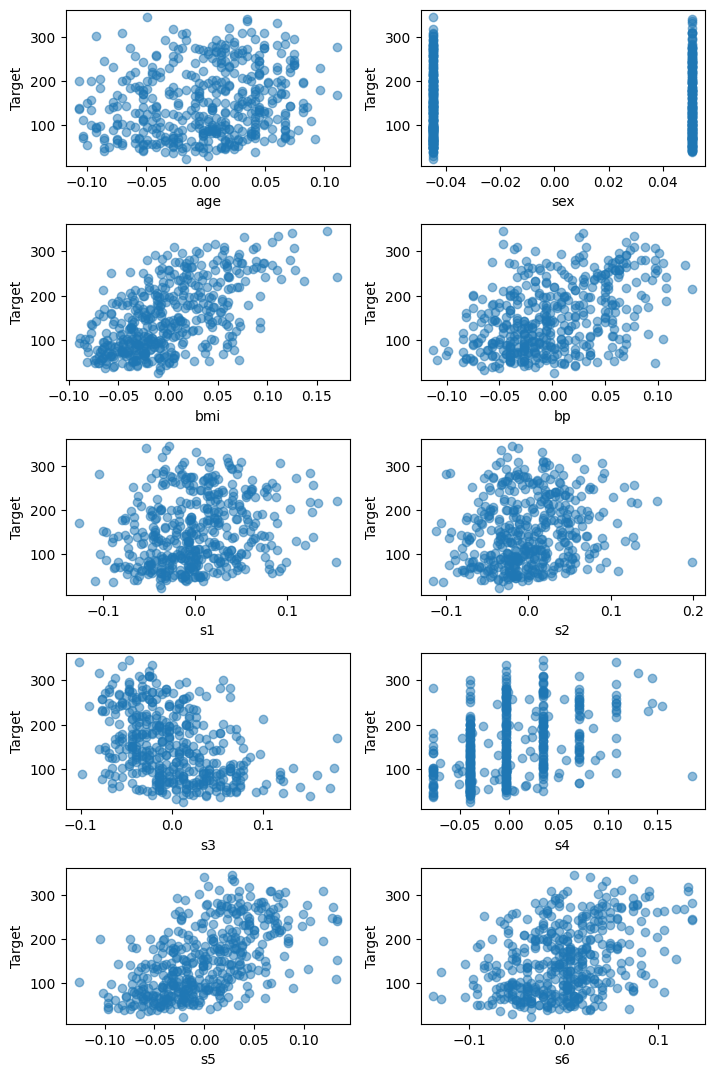

In [ ]:
# descriptive statistics
display(df.describe().round(2))

# correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

# histogram of each of the features
fig, axs = plt.subplots(2, 5, figsize=(7.25, 7.25/2))
for i, ax in enumerate(axs.ravel()):
    ax.hist(X[:, i], bins=20)
    ax.set_title(diabetes.feature_names[i])

fig.tight_layout()
plt.show()
            
# boxplot of each of the features
plt.figure(figsize=(7.25, 7.25/2))
plt.boxplot(X, vert=True, tick_labels=diabetes.feature_names)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# scatter plot of each feature against the target
fig, axs = plt.subplots(5, 2, figsize=(7.25, 7.25 * 1.5))
for i, ax in enumerate(axs.ravel()):
    ax.scatter(X[:, i], y, alpha=0.5)
    ax.set_xlabel(diabetes.feature_names[i])
    ax.set_ylabel("Target")

fig.tight_layout()
plt.show()


## Task 2

### Lasso Regression

In [85]:
class LassoRegression():
    def __init__(self, learning_rate, iterations, penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.penalty = penalty
        self.weights = None 
        self.X_train = None  # training data
        self.y_train = None  # training labels
        self.training_loss = None  # training loss over iterations

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.weights = np.zeros(X.shape[1] + 1) # add one for bias term
        self.training_loss = [] # reset training loss

        for i in range(self.iterations):
            self.update_weights()
            
            # compute training loss
            error = self.predict(X) - y
            loss = (
                (1 / (2 * X.shape[0])) * np.linalg.norm(error, 2) ** 2 + 
                self.penalty * np.linalg.norm(self.weights[1:], 1)
                ) # exclude bias term from penalty
            self.training_loss.append(loss) # store training loss for given iteration
        return self
    
    def update_weights(self):
        m = self.X_train.shape[0]
        X_aug = np.hstack((np.ones((m, 1)), self.X_train)) # augment with bias term
        weights_gradient = 1 / m * (X_aug.T @ (X_aug @ self.weights - self.y_train))
        self.weights -= self.learning_rate * weights_gradient
        # apply soft-thresholding for L1 penalty (excluding bias term)
        self.weights[1:] = LassoRegression.soft_threshold(
            self.weights[1:], self.learning_rate * self.penalty
            ) 
 
    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model is not trained yet.")
        else:
            return X @ self.weights[1:] + self.weights[0]
        
    @staticmethod
    def soft_threshold(z, alpha):
        return np.sign(z) * np.maximum(np.abs(z) - alpha, 0)

### ElasticNet

### Analysis

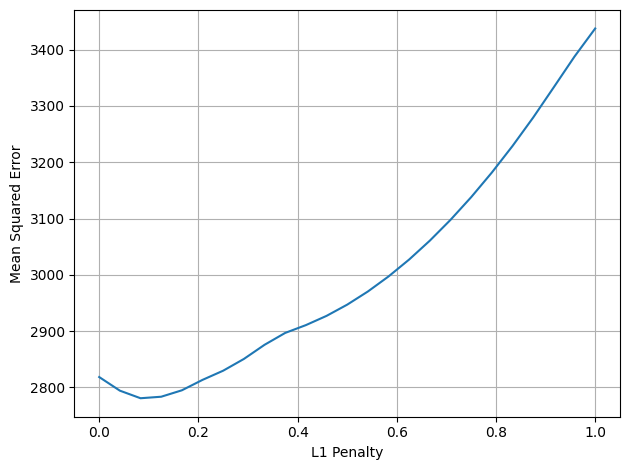

Lasso Regression MSE: 2775.19
Linear Regression MSE: 2821.75


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# MSE vs L1 penalty figure for lasso regression
mse = []
for penalty in np.linspace(0, 1, 25):
    lasso = LassoRegression(learning_rate=1.5, iterations=1000, penalty=penalty).fit(Xtrain, ytrain)
    ypred = lasso.predict(Xtest)
    mse.append(mean_squared_error(ytest, ypred))
plt.plot(np.linspace(0, 1, 25), mse)
plt.grid()
plt.xlabel("L1 Penalty")
plt.ylabel("Mean Squared Error")
plt.tight_layout()
plt.show()

# lasso regression
lasso_regression = LassoRegression(learning_rate=1.5, iterations=10000, penalty=0.1).fit(Xtrain, ytrain)
ypred_lasso = lasso_regression.predict(Xtest)
mse_lasso = mean_squared_error(ytest, ypred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

# linear regression from sklearn
linear_regression = LinearRegression().fit(Xtrain, ytrain)
ypred_lr = linear_regression.predict(Xtest)
mse_lr = mean_squared_error(ytest, ypred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")